In [16]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [33]:
def fetch_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data['Adj Close']

# Example usage
symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2021-01-01'
prices = fetch_data(symbol, start_date, end_date)


[*********************100%%**********************]  1 of 1 completed


In [34]:
returns = prices.pct_change().dropna()

In [35]:
def monte_carlo_simulation(returns, num_simulations, num_days, mu, sigma):
    simulations = np.zeros((num_days, num_simulations))
    daily_returns = np.exp(mu + sigma * np.random.randn(num_days, num_simulations))
    simulations[0] = returns.iloc[-1] * daily_returns[0]
    
    for i in range(1, num_days):
        simulations[i] = simulations[i - 1] * daily_returns[i]
    
    return simulations

num_simulations = 1000
num_days = 252
mu = returns.mean()
sigma = returns.std()
simulations = monte_carlo_simulation(returns, num_simulations, num_days, mu, sigma)

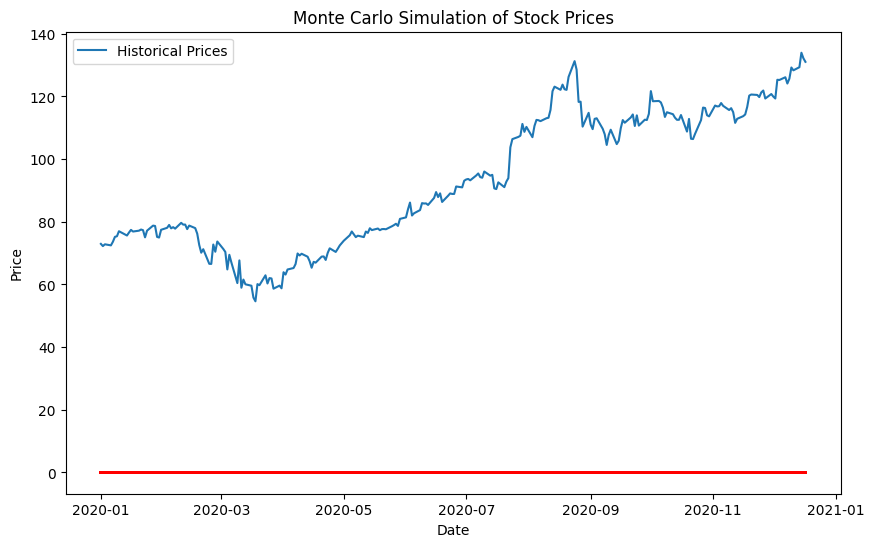

In [36]:
def visualize_simulation(prices, simulations, start_date, end_date):
    trading_days = pd.date_range(start=start_date, end=end_date, freq='B')  # Generate trading days
    num_days = min(len(prices), len(simulations))
    trading_days = trading_days[:num_days]
    prices = prices[:num_days]
    simulations = simulations[:num_days]
    plt.figure(figsize=(10, 6))
    plt.plot(trading_days, prices, label='Historical Prices')
    plt.plot(trading_days, simulations, color='r', alpha=0.03)
    plt.title('Monte Carlo Simulation of Stock Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Example usage
start_date = '2020-01-01'
end_date = '2021-01-01'
visualize_simulation(prices, simulations, start_date, end_date)

In [37]:
def calculate_metrics(simulations, alpha=0.05):
    final_prices = simulations[-1]
    final_prices_sorted = np.sort(final_prices)
    
    # Calculate Value-at-Risk (VaR)
    var_index = int(np.floor(alpha * len(final_prices_sorted)))
    var = final_prices_sorted[var_index]
    
    # Calculate Conditional Value-at-Risk (CVaR)
    cvar = final_prices_sorted[:var_index].mean()
    
    return var, cvar
    
var, cvar = calculate_metrics(simulations)
print(f"Value-at-Risk (VaR) at 5% level: {var:.2f}")
print(f"Conditional Value-at-Risk (CVaR) at 5% level: {cvar:.2f}")


Value-at-Risk (VaR) at 5% level: -0.03
Conditional Value-at-Risk (CVaR) at 5% level: -0.04


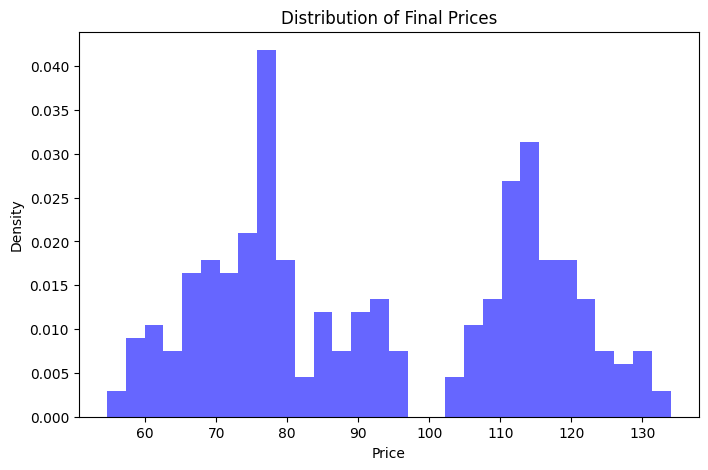

In [38]:
def visualize_distribution(prices):
    plt.figure(figsize=(8, 5))
    plt.hist(prices, bins=30, density=True, alpha=0.6, color='b')
    plt.title('Distribution of Final Prices')
    plt.xlabel('Price')
    plt.ylabel('Density')
    plt.show()

# Example usage
visualize_distribution(prices)
